# Coursework 2

**Name:** Baran Buluttekin

**ID No:** 13153116

We can start our analysis by importing libraries. Some of the libraries are optional such as json, you can skip importing if you just want to use data genarator fuction myHealthcare with list or dictionary data type. Please make sure to install the libraries before running script `coursework.py`

In [1]:
import json # optional
from collections import Counter
import time
import datetime
from random import randint, seed, sample
import matplotlib.pyplot as plt
import numpy as np # optional
seed(404)
%matplotlib inline

MyHealthcare function is created using `random.randint` in specified range. 

In [2]:
def myHealthcare(n=1000, output="list"):
    """
    Simulates n number of observations in specified range and returns
    data frame.

    Parameters:
    ===========
    n : (int) Number of observations you want to simulate.

    output: (str) Sets the type of the output format.
    Available formats: Dictionary, json, numpy array, list
    """
    seed(404) # sets the seed for reproducability
    temperature = [randint(36, 39) for i in range(n)]
    heart_rate = [randint(55, 100) for i in range(n)]
    pulse = [randint(55, 100) for i in range(n)]
    blood_pressure = [randint(120, 121) for i in range(n)]
    respiratory_rate = [randint(11, 17) for i in range(n)]
    oxygen_saturation = [randint(93, 100) for i in range(n)]
    ph = [randint(71, 76) / 10 for i in range(n)]
    ts = []
    current_time = datetime.datetime(2018, 12, 9)
    time_step = datetime.timedelta(seconds=5)
    while len(ts) < n:
        ts.append(current_time)  # .strftime('%Y-%m-%d %H:%M:%S')
        current_time += time_step

    simulated_data = {"ts": ts,
                      "temp": temperature,
                      "hr": heart_rate,
                      "pulse": pulse,
                      "bloodpr": blood_pressure,
                      "resrate": respiratory_rate,
                      "oxsat": oxygen_saturation,
                      "ph": ph}

    if output == "dictionary":
        return simulated_data
    elif output == "json":
        return json.dumps(simulated_data)
    elif output == "array":
        return np.array([i for i in zip(ts,
                                        temperature,
                                        heart_rate,
                                        pulse,
                                        blood_pressure,
                                        respiratory_rate,
                                        oxygen_saturation,
                                        ph
                                        )])
    elif output == "list":
        lst_format = []
        for t, te, he, pu, bl, re, ox, p in zip(ts,
                                                temperature,
                                                heart_rate,
                                                pulse,
                                                blood_pressure,
                                                respiratory_rate,
                                                oxygen_saturation,
                                                ph):
            lst_format.append([t, te, he, pu, bl, re, ox, p])
        return lst_format


`abnormalSignAnalytics` function implemented to findout how many abnormal values in the sampled data. Function design to check abnormal values in either "pulse" or "bloodpr" variable as the abnormal values added inside the functions logic. Function returns a list that includes variable that abnormal value that is searched, number of abnormal values and the instances of abnormal values.

In [3]:
def abnormalSignAnalytics(data, n=50, variable="pulse"):
    """
    Samples the data and detects abnormal values in given value.
    """
    seed(404)
    sample_data = sample(data, n)

    ab_value = []
    count = 0
    for i in sample_data:
        if variable == "pulse":
            if (i[3] < 60) or (i[3] > 99):
                count += 1
                ab_value.append([i[0], i[3]])
        if variable == "bloodpr":
            if i[4] > 120:
                count += 1
                ab_value.append(i[0], i[4])
        if variable != "pulse" and variable != "bloodpr":
            raise ValueError("Only pulse and bloodpr variables excepted!")
    return [variable, count, ab_value]

In [4]:
data = myHealthcare()
abnormalSignAnalytics(data)

['pulse',
 7,
 [[datetime.datetime(2018, 12, 9, 0, 44, 10), 57],
  [datetime.datetime(2018, 12, 9, 0, 56, 15), 58],
  [datetime.datetime(2018, 12, 9, 1, 3, 55), 59],
  [datetime.datetime(2018, 12, 9, 0, 12), 58],
  [datetime.datetime(2018, 12, 9, 0, 22, 45), 56],
  [datetime.datetime(2018, 12, 9, 0, 23, 35), 100],
  [datetime.datetime(2018, 12, 9, 0, 6, 20), 57]]]

`frequencyAnalytics` calculates abnormal values like the `abnormalSignAnalytics` function and plots firstly the "pulse" values and marks the abnormal values in same graph. Later on calculates frequency of each pulse values and plot a histogram of these values. If required display variable can set to `True` and the function will return a counter object with each number of occurence of values in data form.

In [5]:
def frequencyAnalytics(data, n=50, display=False):
    """
    Calculates the frequency of values in the sampled data.
    """
    sample_data = data

    freq = Counter(sample_data['pulse'])

    abnormal_data = []
    for i in sample_data['pulse']:
        if (i < 60) or (i > 99):
            index = sample_data["pulse"].index(i)
            abnormal_data.append([sample_data["ts"][index],
                                  sample_data["pulse"][index]])
    ab_ts = [i[0] for i in abnormal_data]
    ab_dt = [i[1] for i in abnormal_data]

    plt.style.use('seaborn-white')
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[1].hist(sample_data['pulse'], 50)
    ax[1].set_xlabel('Pulse \n 2B')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title('Histogram of Pulse frequency')
    ax[0].plot(sample_data["ts"], sample_data["pulse"])
    ax[0].plot(ab_ts, ab_dt, "o")
    for tick in ax[0].get_xticklabels():
        tick.set_rotation(45)
    ax[0].set_xlabel('Time \n 2A')
    ax[0].set_ylabel('Pulse')
    ax[0].set_title('Plot of abnormal values vs pulse rates over a time')
    plt.show()
    if display:
        return freq

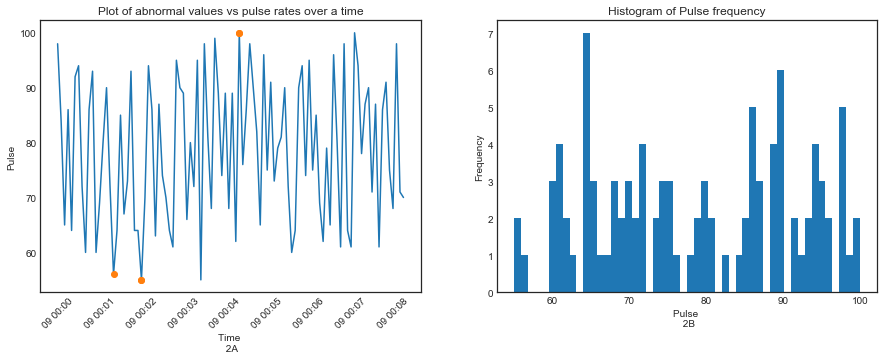

In [6]:
df = myHealthcare(100, output="dictionary")
frequencyAnalytics(df, 100)

Below is a `HealthAnalyzer` function desined to return instances in data where specified value will be searched and returned based on two different algorithm. First algorith is naive or in other words linear search algorithm. This algorithm searches every row in the data from start to finish and makes a list of all instances where "pulse" value equal to value we are interested. Complexity of this algorithm is $O(n)$ as the number of observations (n) increase time to complete this search will increase linearly.

Second search algorith is binary search, in this implementation binary search algorithm is modified to allow us to capture all of the values we look for. Way that impelemtation works is that given the nature of volatile data algorithm first sorts the data using python sorted function which uses the Tim sort algorithm[1][2]. Complexity of tim sort is $O(n\log(n))$. After sorting is completed binariy search finds an element using standard binary search and after finding the element it searches forward and backwards along that element until it finds differnt value then it stops and returns all the elements with that given value. Complexity of this new binary search algorithm would be $O(\log(n) + m)$ where the m is equal to number of elements we are returning. Given these two operations, binary search we implemented in is expected to have time complextiy of approximately $O(n^2)$.

In [7]:
def HealthAnalyzer(data, value=56, method="naive"):
    """
    Search function for health data searches for specific pulse value.
    """
    if method == "naive":
        val_list = []
        for i in data:
            if i[3] == value:
                val_list.append(i)
        return val_list
    if method == "binary":
        data = sorted(data, key=lambda x: x[3])
        val_list = []
        l = 0
        r = len(data) - 1
        while l < r:
            mid = mid = int(l + (r - l) / 2)
            if data[mid][3] == value:
                val_list.append(data[mid])
                for i in range(mid - 1, -1, -1):
                    if data[i][3] == value:
                        val_list.append(data[i])
                    else:
                        break
                for i in range(mid + 1, r):
                    if data[i][3] == value:
                        val_list.append(data[i])
                    else:
                        break
                return val_list
            elif data[mid][3] < value:
                l = mid + 1
            else:
                r = mid - 1

Final fuction is `benchmarking` it will run the fuction that passed into it in this case the HealtAnalyzer, with values ranging from 1000 to 7500 and record the runtime with different algorithms.

In [8]:
def benchmarking(func, params, value, display=False):
    """
    Benchmarks the function passed on based on parameters.
    """
    run_time = {}
    iterations = list(range(1000, 7500, 100))
    for j in params:
        run_time[j] = []
        for i in iterations:
            data = myHealthcare(i)
            start = time.time()
            func(data, value, j)
            finish = time.time()
            run_time[j].append(finish - start)
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(iterations, run_time["naive"], label="naive")
    ax.plot(iterations, run_time["binary"], label="binary")
    ax.set_xlabel("Number of Observations")
    ax.set_ylabel("Complexity")
    ax.set_title("Comparison of complexity for two algorithm")
    ax.legend()
    plt.show()
    if display:
        return run_time

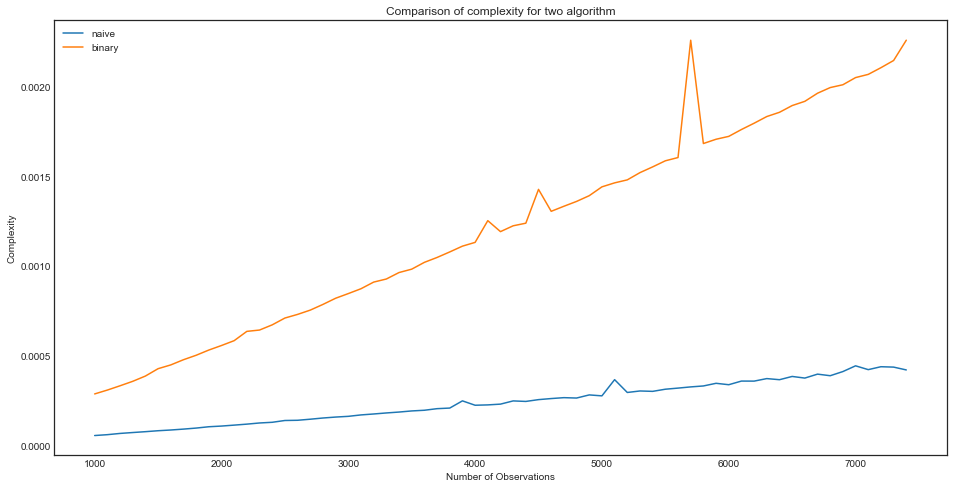

In [9]:
benchmarking(HealthAnalyzer, ["naive", "binary"], 56)

[1] https://en.wikipedia.org/wiki/Timsort

[2] [[Python-Dev] Sorting](https://mail.python.org/pipermail/python-dev/2002-July/026837.html)